Разработать алгоритм моделирования нормально распреде- ленного случайного вектора с заданными математическим ожиданием и корреляционной матрицей

In [462]:
import numpy as np
import matplotlib.pyplot as plt

# Вектор средних 
M = np.array([-2.0, -1.0, 0.0, 1.0, 2.0], dtype=float)



# Корреляционная матрица
B = np.array([
    [1.0,    0.6,    0.36,   0.216,  0.1296],
    [0.6,    1.0,    0.6,    0.36,   0.216 ],
    [0.36,   0.6,    1.0,    0.6,    0.36  ],
    [0.216,  0.36,   0.6,    1.0,    0.6   ],
    [0.1296, 0.216,  0.36,   0.6,    1.0   ]
], dtype=float)



In [463]:
def get_normal_matrix(n, N):
    q=1000
    U = np.random.uniform(0, 1, (n, q))
    S = U.sum(axis=1)
    
    mean = 0.5 * q
    std  = np.sqrt(q / 12)
    E = (S - mean) / std
    return E

In [464]:
def get_A_matrix(B):
    n = B.shape[0]
    A = np.zeros((n, n))
    A[0,0]=np.sqrt(B[0,0])
    for i in range(n):
        for j in range(i + 1):
            if i == j:
                # диагональные элементы
                sum_val = sum(A[i, k]**2 for k in range(j))
                A[i, j] = np.sqrt(B[i, i] - sum_val)
            else:
                # внедиагональные элементы
                sum_val = sum(A[i, k] * A[j, k] for k in range(j))
                A[i, j] = (B[i, j] - sum_val) / A[j, j]

    return A


In [465]:
def get_X_matrix(B, M, A):
    n = B.shape[0]
    
    E = get_normal_matrix(n, 200)
    X  = np.dot(A, E) + M
    return X



In [466]:
A = get_A_matrix(B)
X = get_X_matrix(B, M, A)



Смоделировать и изобразить графически обучающие выборки объема N=200 для двух нормально распределенных двумер- ных случайных векторов с заданными математическими ожи- даниями и самостоятельно подобранными равными корреля- ционными матрицами.

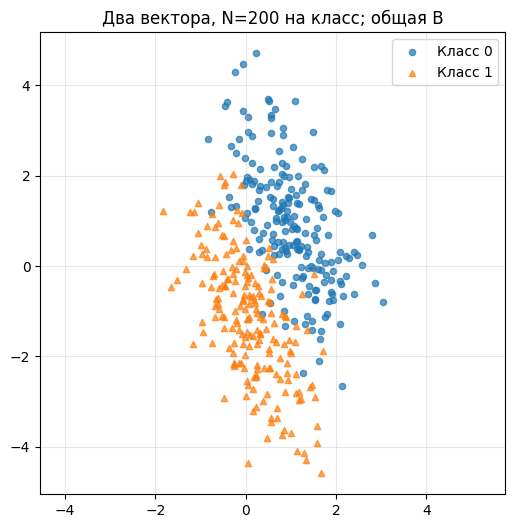

In [467]:
# Мат. ожидания для двух классов
M0 = np.array([1.0, 1.0]) 
M1 = np.array([0.0, -1.0])

# Общая матрица
B01 = np.array([
    [0.5, -0.6],
    [-0.6, 2.0]
], dtype=float)


A01 = get_A_matrix(B01)
X0 = np.array([get_X_matrix( B01, M0, A01).flatten() for _ in range(200)])

X1 = np.array([get_X_matrix(B01,M1, A01).flatten() for _ in range(200)])
# X0 = get_X_matrix(B01, M0, A01)
# X1 = get_X_matrix(B01, M1, A01)

plt.figure(figsize=(6,6))
plt.scatter(X0[:,0], X0[:,1], s=20, alpha=0.7, label="Класс 0", marker="o")
plt.scatter(X1[:,0], X1[:,1], s=20, alpha=0.7, label="Класс 1", marker="^")
plt.title(f"Два вектора, N=200 на класс; общая B")
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.show()


Смоделировать и изобразить графически обучающие выборки объема N=200 для трех нормально распределенных двумер- ных случайных векторов с заданными математическими ожи- даниями и с неравными корреляционными матрицами, кото- рые выбрать самостоятельно

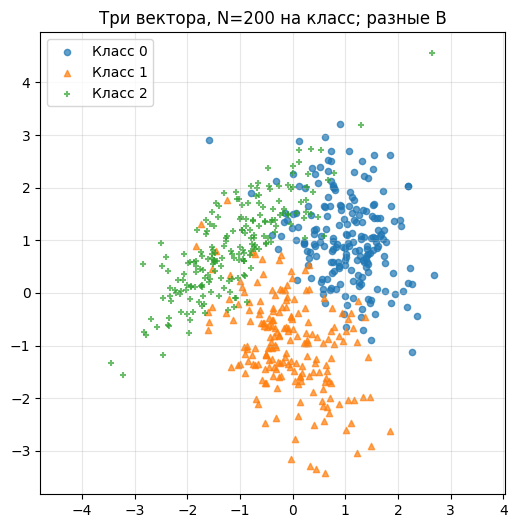

In [468]:
M03 = np.array([1.0, 1.0])
M13 = np.array([0.0, -1.0])
M23 = np.array([-1.0, 1.0])

B03 = np.array([[0.5,  -0.20],
               [-0.20, 0.7 ]], dtype=float)   

B13 = np.array([[0.5, -0.30],
               [-0.30, 0.7 ]], dtype=float)  
B23 = np.array([[1.0,  0.85],
               [0.85, 1.0 ]], dtype=float)

A03 = get_A_matrix(B03)
A13 = get_A_matrix(B13)
A23 = get_A_matrix(B23)

X03 = np.array([get_X_matrix(B03, M03, A03).flatten() for _ in range(200)])
X13 = np.array([get_X_matrix(B13, M13, A13).flatten() for _ in range(200)])
X23 = np.array([get_X_matrix(B23, M23, A23).flatten() for _ in range(200)])


plt.figure(figsize=(6,6))
plt.scatter(X03[:,0], X03[:,1], s=20, alpha=0.7, label="Класс 0", marker="o")
plt.scatter(X13[:,0], X13[:,1], s=20, alpha=0.7, label="Класс 1", marker="^")
plt.scatter(X23[:,0], X23[:,1], s=20, alpha=0.7, label="Класс 2", marker="+")
plt.title(f"Три вектора, N=200 на класс; разные B")
plt.legend()
plt.axis('equal')
plt.grid(True, alpha=0.3)
plt.show()

 На основании полученных выборок найти точечные оценки параметров нормального закона для каждого из распределе- ний.

In [469]:
def get_exem(X, N=200):
    M_hat = X.mean(axis=0)
    sum_B_hat = np.zeros((X.shape[1], X.shape[1]))
    for i in range(N):
        sum_B_hat += np.outer(X[i]-M_hat, (X[i]-M_hat).T)
    B_hat = sum_B_hat/N
    return M_hat, B_hat




In [470]:
M_hat_0, B_hat_0 = get_exem(X0)
M_hat_1, B_hat_1 = get_exem(X1)

print("=== 1 класс - 2 вектора ===")
print("М_hat:", M_hat_0)
print("М:", M0)
print("B_hat:\n", B_hat_0)
print("B:\n", B01)
print()
print("=== 2 класс - 2 вектора ===")
print("М_hat:", M_hat_1)
print("М:", M1)
print("B_hat:\n", B_hat_1)
print("B:\n", B01)
print()

=== 1 класс - 2 вектора ===
М_hat: [1.02528954 0.90314903]
М: [1. 1.]
B_hat:
 [[ 0.52818173 -0.54673034]
 [-0.54673034  1.81007699]]
B:
 [[ 0.5 -0.6]
 [-0.6  2. ]]

=== 2 класс - 2 вектора ===
М_hat: [ 0.08654132 -1.13222521]
М: [ 0. -1.]
B_hat:
 [[ 0.47632034 -0.58005905]
 [-0.58005905  1.92959585]]
B:
 [[ 0.5 -0.6]
 [-0.6  2. ]]



In [471]:
M_hat_0, B_hat_0 = get_exem(X03)
M_hat_1, B_hat_1 = get_exem(X13)
M_hat_2, B_hat_2 = get_exem(X23)

print("=== 1 класс - 3 вектора ===")
print("М_hat:", M_hat_0)
print("М:", M03)
print("B_hat:\n", B_hat_0)
print("B:\n", B03)
print()
print("=== 2 класс - 3 вектора ===")
print("М_hat:", M_hat_1)
print("М:", M13)
print("B_hat:\n", B_hat_1)
print("B:\n", B13)
print()
print("=== 3 класс - 3 вектора ===")
print("М_hat:", M_hat_2)
print("М:", M23)
print("B_hat:\n", B_hat_2)
print("B:\n", B23)
print()

=== 1 класс - 3 вектора ===
М_hat: [1.02336652 1.0332912 ]
М: [1. 1.]
B_hat:
 [[ 0.40259312 -0.14701254]
 [-0.14701254  0.6697675 ]]
B:
 [[ 0.5 -0.2]
 [-0.2  0.7]]

=== 2 класс - 3 вектора ===
М_hat: [-0.08715323 -0.96849903]
М: [ 0. -1.]
B_hat:
 [[ 0.49810982 -0.27433103]
 [-0.27433103  0.80257411]]
B:
 [[ 0.5 -0.3]
 [-0.3  0.7]]

=== 3 класс - 3 вектора ===
М_hat: [-1.12582966  0.8685643 ]
М: [-1.  1.]
B_hat:
 [[0.78528107 0.63525317]
 [0.63525317 0.77564751]]
B:
 [[1.   0.85]
 [0.85 1.  ]]

